In [13]:
import sys
import pandas as pd

print(sys.executable)
print(pd.__version__)


/opt/anaconda3/envs/mlz/bin/python
2.3.3


In [14]:
df = pd.read_csv("data/house_prices.csv")
df.shape


(187531, 21)

In [15]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [16]:
import os, sys
print("CWD =", os.getcwd())
print("sys.executable =", sys.executable)
print("sys.path[0:5] =", sys.path[:5])


CWD = /Users/JW/Documents/mlzoomcamp/house-price-prediction
sys.executable = /opt/anaconda3/envs/mlz/bin/python
sys.path[0:5] = ['/opt/anaconda3/envs/mlz/lib/python310.zip', '/opt/anaconda3/envs/mlz/lib/python3.10', '/opt/anaconda3/envs/mlz/lib/python3.10/lib-dynload', '', '/opt/anaconda3/envs/mlz/lib/python3.10/site-packages']


In [17]:
df.describe()

,Index,Price (in rupees),Dimensions,Plot Area
count,187531.000000,1.698660e+05,0.0,0.0
mean,93765.000000,7.583772e+03,NaN,NaN
std,54135.681003,2.724171e+04,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN
25%,46882.500000,4.297000e+03,NaN,NaN
50%,93765.000000,6.034000e+03,NaN,NaN
75%,140647.500000,9.450000e+03,NaN,NaN
max,187530.000000,6.700000e+06,NaN,NaN


In [18]:
df.describe()

,Index,Price (in rupees),Dimensions,Plot Area
count,187531.000000,1.698660e+05,0.0,0.0
mean,93765.000000,7.583772e+03,NaN,NaN
std,54135.681003,2.724171e+04,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN
25%,46882.500000,4.297000e+03,NaN,NaN
50%,93765.000000,6.034000e+03,NaN,NaN
75%,140647.500000,9.450000e+03,NaN,NaN
max,187530.000000,6.700000e+06,NaN,NaN


In [19]:
df.isna().mean().sort_values(ascending=False).head(20)

Plot Area            1.000000
Dimensions           1.000000
Society              0.584853
Super Area           0.574225
Car Parking          0.551146
overlooking          0.434254
Carpet Area          0.430185
facing               0.374514
Ownership            0.349366
Balcony              0.260944
Price (in rupees)    0.094198
Floor                0.037738
Description          0.016120
Furnishing           0.015448
Bathroom             0.004415
Status               0.003279
Transaction          0.000443
Title                0.000000
location             0.000000
Amount(in rupees)    0.000000
dtype: float64

In [20]:
df['Price (in rupees)'].describe()

count    1.698660e+05
mean     7.583772e+03
std      2.724171e+04
min      0.000000e+00
25%      4.297000e+03
50%      6.034000e+03
75%      9.450000e+03
max      6.700000e+06
Name: Price (in rupees), dtype: float64

In [21]:
import numpy as np
import pandas as pd

df = df.copy()
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(' ', '_')
              .str.replace('(', '')
              .str.replace(')', '')
             )


target = 'price_in_rupees'


drop_cols = ['plot_area', 'dimensions']  # 你EDA看到100%缺失
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')


df = df[df[target].notna()].copy()

df = df[df[target] > 0].copy()

df.shape

(169855, 19)

In [22]:
df.columns

Index(['index', 'title', 'description', 'amountin_rupees', 'price_in_rupees',
       'location', 'carpet_area', 'status', 'floor', 'transaction',
       'furnishing', 'facing', 'overlooking', 'society', 'bathroom', 'balcony',
       'car_parking', 'ownership', 'super_area'],
      dtype='object')

In [23]:
target = 'price_in_rupees'

features = [
    'location', 'status', 'transaction', 'facing', 'ownership',
    'floor', 'bathroom', 'balcony',
    'carpet_area', 'super_area', 'car_parking',
    'amountin_rupees'
]


features = [c for c in features if c in df.columns]

features, len(features)

(['location',
  'status',
  'transaction',
  'facing',
  'ownership',
  'floor',
  'bathroom',
  'balcony',
  'carpet_area',
  'super_area',
  'car_parking',
  'amountin_rupees'],
 12)

In [32]:
import pandas as pd

num_cols = ['bathroom', 'balcony', 'carpet_area', 'super_area', 'car_parking']

for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')
        df[c] = df[c].fillna(df[c].median())


cat_cols = ['location', 'status', 'transaction', 'facing', 'ownership', 'floor', 'amountin_rupees']

for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].fillna('unknown').astype(str)


all_nan_cols = [c for c in features if c in df.columns and df[c].isna().all()]

print("Columns that are 100% NaN and will be dropped:", all_nan_cols)


if all_nan_cols:
    df = df.drop(columns=all_nan_cols)


features = [c for c in features if c not in all_nan_cols]

print("Remaining features:", features)
print("Number of features:", len(features))


df[features].isna().sum().sort_values(ascending=False).head(20)

Columns that are 100% NaN and will be dropped: ['carpet_area', 'super_area', 'car_parking']
Remaining features: ['location', 'status', 'transaction', 'facing', 'ownership', 'floor', 'bathroom', 'balcony', 'amountin_rupees']
Number of features: 9


location           0
status             0
transaction        0
facing             0
ownership          0
floor              0
bathroom           0
balcony            0
amountin_rupees    0
dtype: int64

In [34]:
df[features + ['price_in_rupees']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 169855 entries, 0 to 187530
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   location         169855 non-null  object 
 1   status           169855 non-null  object 
 2   transaction      169855 non-null  object 
 3   facing           169855 non-null  object 
 4   ownership        169855 non-null  object 
 5   floor            169855 non-null  object 
 6   bathroom         169855 non-null  float64
 7   balcony          169855 non-null  float64
 8   amountin_rupees  169855 non-null  object 
 9   price_in_rupees  169855 non-null  float64
dtypes: float64(3), object(7)
memory usage: 14.3+ MB


In [35]:
df['price_in_rupees'].describe()

count    1.698550e+05
mean     7.584263e+03
std      2.724252e+04
min      1.000000e+00
25%      4.297000e+03
50%      6.034000e+03
75%      9.451000e+03
max      6.700000e+06
Name: price_in_rupees, dtype: float64

In [36]:
print("target NaN:", df['price_in_rupees'].isna().sum())
print("target <= 0:", (df['price_in_rupees'] <= 0).sum())

target NaN: 0
target <= 0: 0


In [37]:
for c in ['location','status','transaction','facing','ownership','floor']:
    if c in df.columns:
        print(c, df[c].nunique())

location 81
status 2
transaction 5
facing 9
ownership 5
floor 932


In [38]:
df[features].isna().sum().sort_values(ascending=False).head(20)

location           0
status             0
transaction        0
facing             0
ownership          0
floor              0
bathroom           0
balcony            0
amountin_rupees    0
dtype: int64

train: 101913 val: 33971 test: 33971


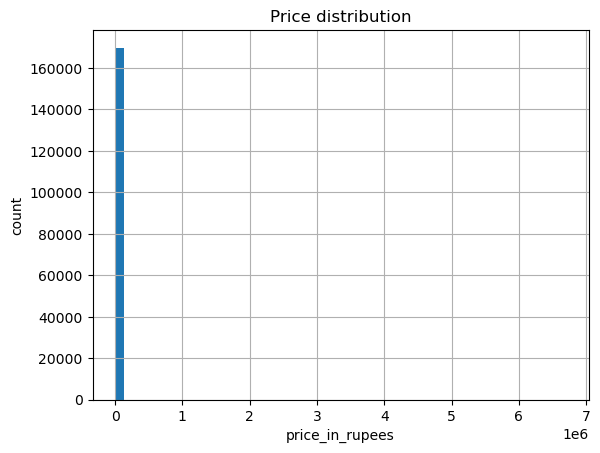

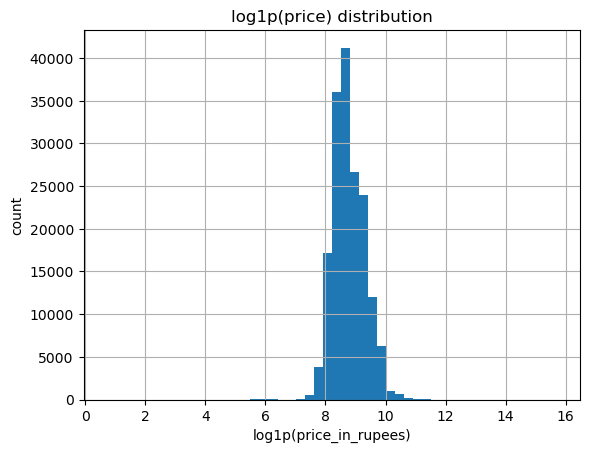

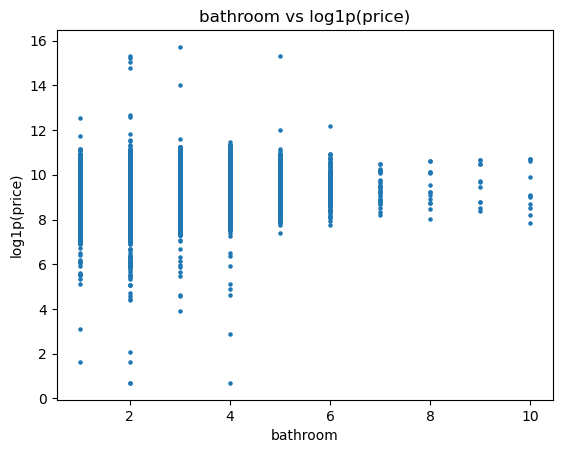

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# 1) price
plt.figure()
df['price_in_rupees'].hist(bins=50)
plt.title('Price distribution')
plt.xlabel('price_in_rupees')
plt.ylabel('count')
plt.show()

# 2) log1p(price)
plt.figure()
np.log1p(df['price_in_rupees']).hist(bins=50)
plt.title('log1p(price) distribution')
plt.xlabel('log1p(price_in_rupees)')
plt.ylabel('count')
plt.show()

# 3) log-space
plt.figure()
plt.scatter(df['bathroom'], np.log1p(df['price_in_rupees']), s=5)
plt.title('bathroom vs log1p(price)')
plt.xlabel('bathroom')
plt.ylabel('log1p(price)')
plt.show()

	•	Price has a long tail and is highly skewed.
	•	After applying log1p, the distribution becomes closer to bell-shaped / more stable, which is better suited for regression.
	•	As the number of bathrooms increases, log(price) tends to be higher (overall trend).

In [50]:
[c for c in ['status', 'price_in_rupees'] if c in df.columns]


['status', 'price_in_rupees']

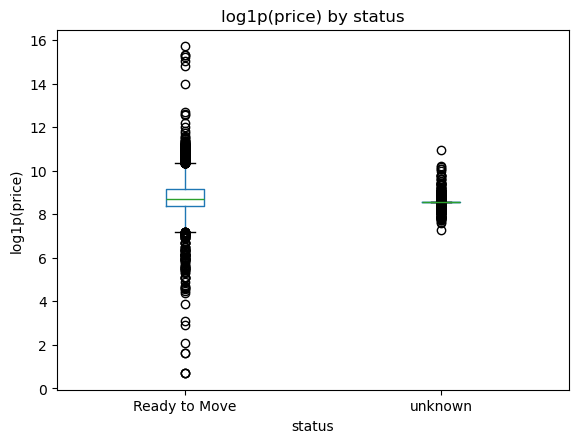

In [51]:
import matplotlib.pyplot as plt
import numpy as np

tmp = df[['status', 'price_in_rupees']].copy()
tmp['log_price'] = np.log1p(tmp['price_in_rupees'])

tmp.boxplot(column='log_price', by='status', grid=False)
plt.title('log1p(price) by status')
plt.suptitle('')
plt.xlabel('status')
plt.ylabel('log1p(price)')
plt.show()

In [52]:
tmp['status'].value_counts()

status
Ready to Move    169260
unknown             595
Name: count, dtype: int64

	•	Most listings are Ready to Move (169,260), while unknown is rare (595), so comparisons involving unknown are less reliable.
	•	The log1p(price) distribution differs by status: Ready to Move shows a wider spread and more high-price outliers, suggesting status may carry useful signal for price prediction.

In [56]:
target = 'price_in_rupees'
df_work = df[features + [target]].copy()

In [57]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df_work, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

print(len(df_train), len(df_val), len(df_test))

101913 33971 33971


In [59]:
import numpy as np

y_train = np.log1p(df_train[target].values)
y_val   = np.log1p(df_val[target].values)

In [60]:
X_train = df_train[features].to_dict(orient='records')
X_val   = df_val[features].to_dict(orient='records')

In [61]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=True)
X_train_dv = dv.fit_transform(X_train)
X_val_dv   = dv.transform(X_val)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

lr = LinearRegression()
lr.fit(X_train_dv, y_train)

pred_val = lr.predict(X_val_dv)
print("LinearRegression RMSE (log-space):", rmse(y_val, pred_val))

LinearRegression RMSE (log-space): 0.18561039395143153


In [63]:
X_test = df_test[features].to_dict(orient='records')
X_test_dv = dv.transform(X_test)

y_test = np.log1p(df_test[target].values)
pred_test = lr.predict(X_test_dv)

print("Test RMSE (log-space):", rmse(y_test, pred_test))

Test RMSE (log-space): 0.18064868284808258


Linear Regression baseline achieves RMSE ≈ 0.186 on validation and ≈ 0.181 on test in log-space.
Similar scores indicate stable generalization (no obvious overfitting).

In [64]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_leaf=20)
dt.fit(X_train_dv, y_train)

pred_val_dt = dt.predict(X_val_dv)
print("DecisionTree RMSE (log-space):", rmse(y_val, pred_val_dt))

DecisionTree RMSE (log-space): 0.3247837017961911


In [65]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    max_depth=20,
    min_samples_leaf=5
)
rf.fit(X_train_dv, y_train)

pred_val_rf = rf.predict(X_val_dv)
print("RandomForest RMSE (log-space):", rmse(y_val, pred_val_rf))

RandomForest RMSE (log-space): 0.25851537391248314


In [66]:
pred_test_rf = rf.predict(X_test_dv)
print("RandomForest Test RMSE (log-space):", rmse(y_test, pred_test_rf))

RandomForest Test RMSE (log-space): 0.25250448735750597


Linear regression with one-hot encoded categorical features performs best (RMSE ≈ 0.18 in log-space). Tree-based models (Decision Tree / Random Forest) perform worse under the current feature representation.

In [70]:
from sklearn.linear_model import Ridge
import numpy as np

alphas = [0.0, 0.01, 0.1, 1, 10, 50, 100, 200]
results = []

for a in alphas:
    if a == 0.0:
        model = Ridge(alpha=0.0, random_state=42)
    else:
        model = Ridge(alpha=a, random_state=42)

    model.fit(X_train_dv, y_train)
    pred_val = model.predict(X_val_dv)
    score = rmse(y_val, pred_val)
    results.append((a, score))
    print(f"alpha={a:<6}  val_RMSE(log-space)={score:.6f}")

best_alpha, best_score = sorted(results, key=lambda x: x[1])[0]
print("\nBEST:", best_alpha, best_score)

alpha=0.0     val_RMSE(log-space)=0.185635
alpha=0.01    val_RMSE(log-space)=0.185611
alpha=0.1     val_RMSE(log-space)=0.185610
alpha=1       val_RMSE(log-space)=0.188886
alpha=10      val_RMSE(log-space)=0.208795
alpha=50      val_RMSE(log-space)=0.231069
alpha=100     val_RMSE(log-space)=0.243282
alpha=200     val_RMSE(log-space)=0.259079

BEST: 0.1 0.18561041988691018


In [68]:
from sklearn.linear_model import Ridge

best_alpha = 0.1
ridge = Ridge(alpha=best_alpha, random_state=42)
ridge.fit(X_train_dv, y_train)

pred_val = ridge.predict(X_val_dv)
print("Ridge val RMSE (log-space):", rmse(y_val, pred_val))

pred_test = ridge.predict(X_test_dv)
print("Ridge test RMSE (log-space):", rmse(y_test, pred_test))

Ridge val RMSE (log-space): 0.18561041988691018
Ridge test RMSE (log-space): 0.18049629123407313


Ridge regression tuning: I tried multiple values of alpha and selected the best one based on validation RMSE in log-space.
The best setting is alpha = 0.1, achieving val RMSE ≈ 0.1856 and test RMSE ≈ 0.1805.
The validation and test scores are close, suggesting the model generalizes well.

In [71]:
from sklearn.linear_model import Ridge

# 1) train + val
df_train_full = pd.concat([df_train, df_val], axis=0)

# 2) y
y_train_full = np.log1p(df_train_full[target].values)

# 3) X dict
X_train_full = df_train_full[features].to_dict(orient='records')
X_train_full_dv = dv.fit_transform(X_train_full)  # 这里重新fit dv，用full train

# 4) train final ridge
final_model = Ridge(alpha=0.1, random_state=42)
final_model.fit(X_train_full_dv, y_train_full)

# 5) test
X_test = df_test[features].to_dict(orient='records')
X_test_dv = dv.transform(X_test)
y_test = np.log1p(df_test[target].values)

pred_test = final_model.predict(X_test_dv)
print("FINAL Ridge test RMSE (log-space):", rmse(y_test, pred_test))

FINAL Ridge test RMSE (log-space): 0.1778703165667748


In [72]:
import pickle

with open("model.bin", "wb") as f:
    pickle.dump(
        {
            "model": final_model,
            "dv": dv,
            "features": features,
            "target": target
        },
        f
    )

print("Saved to model.bin")

Saved to model.bin
